## <div align=center> Round Table Seating Arrangement </div>
<div align=center>Using Metahuerstic Algorithms</div>
<hr>

#### <b>Abstract</b>
In this report, the Round Table Seating arrangemnet is approached diffrently formulated as a search problem. The approchaes are Genetic Algorithm, Simulated Annealing, and Hill Climbing. Then a comparison is made between them. Throughout this report, the theory, implemnattions, discussion and conclusion are presented. It is required that rach person should be seated next to their neighbors on the left and right to facilitate conversation. It also should form a closed loop, as it is a round table.

<hr>

#### <b>Table of Contents</b>
- <b>Introduction</b>
- <b>Objectives</b>
- <b>Theory</b>
- <b>Software Versions</b>
- <b>Algorithms Implementations</b>
- <b>Discussion</b>
- <b>Conclusion</b>

#### <b>List of Figures</b>
- Figure 1: Given Dislike Matrix
- Figure 2: Graph Visualization
- Figure 3: Round Table Seating Arrangement for Genetic
- Figure 4: Round Table Seating Arrangement for Simulated Annealing
- Figure 5: Round Table Seating Arrangement for Hill climbing
- Figure 6: Optimal Round Table Seating Arrangement

#### <b>List of Tables</b>
- Table 0: Metaheursitc Vs. Heuristic
- Table 1: Software Tools and versions
- Table 2: Implemenataions comparisons and results.

<hr>

#### <b>Introduction</b>

In this notebook a heuristic table representing the dislike percentages between pairs of individuals, indicating the level of conflict or discomfort each person feels towards others is provided. The goal is to seat the individuals around a round table in the most suitable arrangement to minimize conflict while ensuring that each person can talk to their neighbors on the left and right. The heuristic table provides dislike percentages between pairs of individuals, with higher percentages indicating greater dislike or conflict. For example, a dislike percentage of 20% between Person A and Person B indicates a low level of conflict, while a dislike percentage of 80% indicates a high level of conflict.

 The follwing figure shows the matrix:

<div align='center'>
<img src="https://github.com/sondosaabed/Introducing-Generative-AI-with-AWS/assets/65151701/79c867bc-5297-4e69-99b6-a2041c919783" alt="Dislike matrix">

<b>Figure 1: </b>Given Dislike Matrix
</div>

#### <b>Objectives</b>
- To implemnet Genetic algorithm
- To implemet Simulated Annealing algorithm
- To implement Hill Climbing algorithm
- To determine which algorithm can find the best seating arrangement that minimizes conflict based on the provided heuristic table and the Non-Linear Dislike Cost function.

#### <b>Theory</b>

##### <b>Metahuerstic Vs. Heuristic</b>
Metahuerstic and Heuristic are both approaches in computer science that are non-exact stratgies. The Non-exact algorithms explore the problem in an intelligent way, thus finding good results in a feasible time with fewer resources.

A **heuristic** is a strategy that uses information about the problem being solved to find promising solutions. Similar to heuristics, **metaheuristics** aim to find promising results for a problem. However, the algorithm used for a metaheuristic is generic and can deal with different problems. *Problem-independent design*. [2]

<div align="center">

**Table 0:** Metahuerstic Vs. Heuristic table [2]

<img src="https://github.com/keras-team/keras/assets/65151701/1d28944d-ba81-4ca0-952c-f1d705668732" height="300">
</div>

##### <b>Genetic Algorthsm (GA)</b>

GA is inspired by the principles of natural selection and genetics. It starts by randomly generating an initial population of solutions, and then evolves the population byapplying operators such as selection, crossover, and mutation. These operators simulate the processof natural selection, where individuals with higher fitness are more likely to reproduce and pass ontheir traits to the next generation. GA has been widely used in optimization problems that involvefinding the best combination of parameters or feature. [1]

##### <b>Simulated Annealing (SA)</b>
SA is a stochastic optimization algorithm that is inspired by the process of annealing in metallurgy. It starts by randomly generating an initial solution, and thengradually reduces the temperature of the system. As the temperature decreases, the algorithmbecomes more likely to accept worse solutions in order to escape local optima. SA has been widelyused in optimization problems that involve finding the best configuration of parameters in complexmodels or simulations. [1]

##### <b>Hill Climbing (HC)</b>
HC is a simple optimization algorithm used in Artificial Intelligence (AI) to find the best possible solution for a given problem. It belongs to the family of local search algorithms and is often used in optimization problems where the goal is to find the best solution from a set of possible solutions. [3]

#### <b>Tools and Versions</b>

The below table shows the tools and versions used to solve this problem.

<b>Table 1:</b> Software Tools and versions

<div align="center">


|Tool | Version |
|-----|---------|
|Python|3.12.2|
|Numpy|1.26.4|
|Matplotlib|3.8.2|
|Pandas|2.2.1|
|Visual Studio Code |Updated|
|networkx|3.0.0|
|heapq|last update|

</div>

<b>Neccessary Imports</b>

In [1]:
import random
random.seed(1210802)
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

#### <b>Data Structure</b>

<b>The follownig dislike matrix was given:</b>

In [2]:
dislike_matrix = {
    'Khalid': {'Khalid': 0.0, 'Ibrahim': 0.45, 'Fuad': 0.78, 'Hakam': 0.81, 'Samir': 0.26, 'Kamal': 0.75, 'Hani': 0.92, 'Ayman': 0.64, 'Salem': 0.99, 'Ahmed': 0.43},
    'Ibrahim': {'Khalid': 0.45, 'Ibrahim': 0.0, 'Fuad': 0.81, 'Hakam': 0.87, 'Samir': 0.37, 'Kamal': 0.42, 'Hani': 0.53, 'Ayman': 0.88, 'Salem': 0.62, 'Ahmed': 0.76},
    'Fuad': {'Khalid': 0.78, 'Ibrahim': 0.81, 'Fuad': 0.0, 'Hakam': 0.92, 'Samir': 0.97, 'Kamal': 0.53, 'Hani': 0.99, 'Ayman': 0.90, 'Salem': 0.17, 'Ahmed': 0.10},
    'Hakam': {'Khalid': 0.81, 'Ibrahim': 0.87, 'Fuad': 0.92, 'Hakam': 0.0, 'Samir': 0.63, 'Kamal': 0.88, 'Hani': 0.78, 'Ayman': 0.51, 'Salem': 0.55, 'Ahmed': 0.33},
    'Samir': {'Khalid': 0.26, 'Ibrahim': 0.37, 'Fuad': 0.97, 'Hakam': 0.63, 'Samir': 0.0, 'Kamal': 0.43, 'Hani': 0.86, 'Ayman': 0.96, 'Salem': 0.20, 'Ahmed': 0.48},
    'Kamal': {'Khalid': 0.75, 'Ibrahim': 0.42, 'Fuad': 0.53, 'Hakam': 0.88, 'Samir': 0.43, 'Kamal': 0.0, 'Hani': 0.91, 'Ayman': 0.63, 'Salem': 0.76, 'Ahmed': 0.82},
    'Hani': {'Khalid': 0.92, 'Ibrahim': 0.53, 'Fuad': 0.99, 'Hakam': 0.78, 'Samir': 0.86, 'Kamal': 0.91, 'Hani': 0.0, 'Ayman': 0.70, 'Salem': 0.11, 'Ahmed': 0.30},
    'Ayman': {'Khalid': 0.64, 'Ibrahim': 0.88, 'Fuad': 0.90, 'Hakam': 0.51, 'Samir': 0.96, 'Kamal': 0.63, 'Hani': 0.70, 'Ayman': 0.0, 'Salem': 0.90, 'Ahmed': 0.55},
    'Salem': {'Khalid': 0.99, 'Ibrahim': 0.62, 'Fuad': 0.17, 'Hakam': 0.55, 'Samir': 0.20, 'Kamal': 0.76, 'Hani': 0.11, 'Ayman': 0.90, 'Salem': 0.0, 'Ahmed': 0.68},
    'Ahmed': {'Khalid': 0.43, 'Ibrahim': 0.76, 'Fuad': 0.10, 'Hakam': 0.33, 'Samir': 0.48, 'Kamal': 0.82, 'Hani': 0.30, 'Ayman': 0.55, 'Salem': 0.68, 'Ahmed': 0.0},
}

<b>Using pandas dataframe</b>

In [3]:
df_dislike = pd.DataFrame.from_dict(dislike_matrix, orient='index')
df_dislike = df_dislike*100
df_dislike.astype(int)

,Khalid,Ibrahim,Fuad,Hakam,Samir,Kamal,Hani,Ayman,Salem,Ahmed
Khalid,0,45,78,81,26,75,92,64,99,43
Ibrahim,45,0,81,87,37,42,53,88,62,76
Fuad,78,81,0,92,97,53,99,90,17,10
Hakam,81,87,92,0,63,88,78,51,55,33
Samir,26,37,97,63,0,43,86,96,20,48
Kamal,75,42,53,88,43,0,91,63,76,82
Hani,92,53,99,78,86,91,0,70,11,30
Ayman,64,88,90,51,96,63,70,0,90,55
Salem,99,62,17,55,20,76,11,90,0,68
Ahmed,43,76,10,33,48,82,30,55,68,0


<b>Initilaize the edges and the nodes from the datframe</b>

Using a Graph datastructure

In [4]:
graph = nx.Graph()
graph.add_nodes_from(df_dislike.index)

# From the dataframe I add the weights to the graph
for i in range(len(df_dislike)):
    for j in range(i + 1, len(df_dislike)):
        weight = df_dislike.iloc[i, j]
        if weight != 0:
            graph.add_edge(df_dislike.index[i], df_dislike.index[j], weight=weight)

# Here I make a loopback to the node itself with weight 0
for node in graph.nodes():
    graph.add_edge(node, node, weight=0)

print(graph)

Graph with 10 nodes and 55 edges


<b>Weighted Grpah Visualization</b>

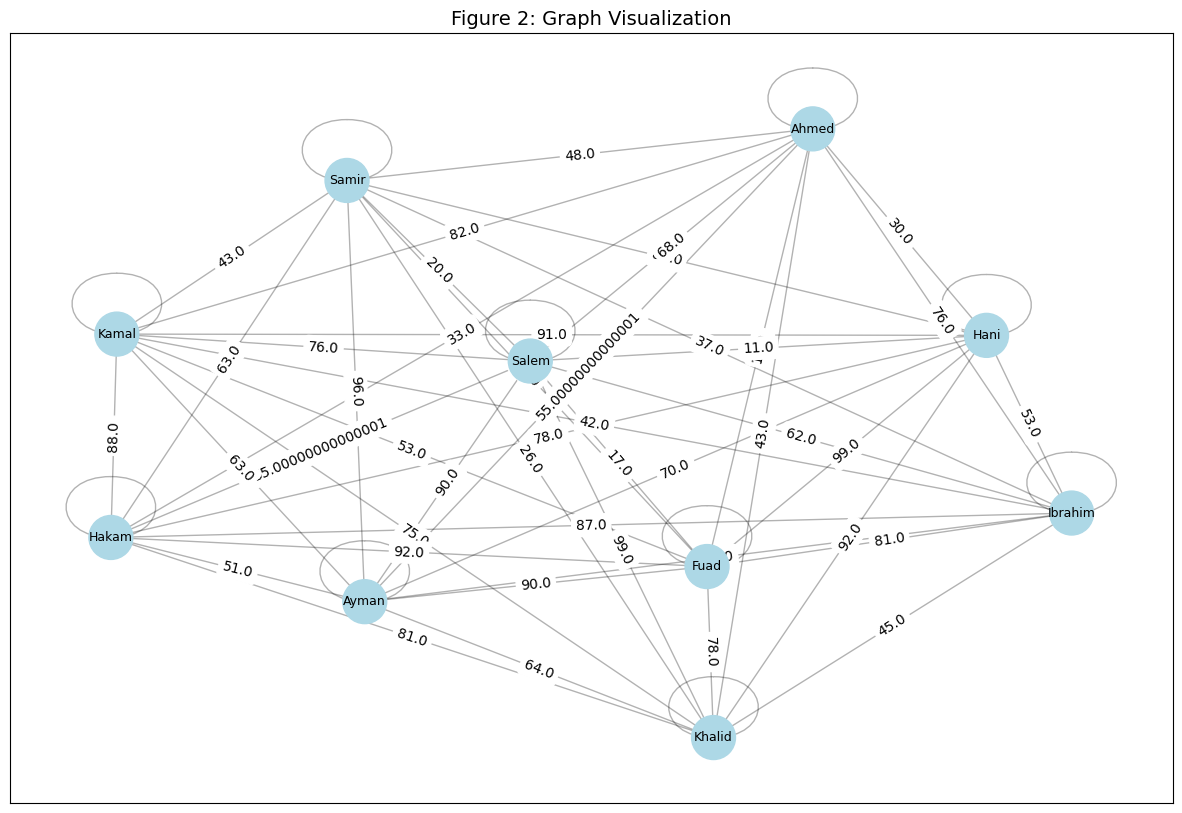

In [5]:
pos = nx.spring_layout(graph)  
node_size = [1000 for _ in graph.nodes] 
labels = nx.get_edge_attributes(graph, 'weight')
plt.figure(figsize=(15, 10)) 
nx.draw_networkx_nodes(graph, pos, node_size=node_size, node_color="lightblue")  
nx.draw_networkx_edges(graph, pos, alpha=0.3, width=1)  
nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels) 
nx.draw_networkx_labels(graph, pos, font_size=9)  
plt.title('Figure 2: Graph Visualization', fontsize=14) ;

#### <b>Cost Function</b>

The cost function used is a Non-Linear Dislike Cost function. Define a non-linear function f(x) that maps dislike percentages to costs. e.g., f(x) = x^2 would make high dislike percentages have a quadratically higher cost.

`f(n) = sum(dislike_percentages_between_neighbors) + sum(f(dislike_percentages_between_neighbors))`

The aim of this function is to penalize highly disliked pairs more severely than just a constant of a linear mapping.

In [6]:
def calculate_cost(path, graph):
    """
    The cost function, this will compute the total cost of the path in a graph.
    The total cost calculation should consider both directions between adjacent pairs to avoid asymmetry. 
    Args:
        path (list): List of nodes or a specific seating arrangements.
        graph (nx.Graph): graph obj. that has the nodes and the edges.
    Return:
        Represents the total dislike in the whole path 
    """
    total_cost = 0.0
    if len(path) == 0:
        return None
    for i in range(len(path)):
        person1 = path[i]
        person2 = path[(i + 1) % len(path)]  
        if graph.has_edge(person1, person2):
            dislike_percentage = graph[person1][person2]['weight']
            total_cost += dislike_percentage**2 # non-linearity
    return total_cost

#### <b>Table solution visualization</b>

- This function is created to visulaize the round table arrangemnet

In [7]:
def visualize_round_table(arrangement, title):
    """
    Visualizes the round table arrangement using a graph plot.
    Args:
        arrangement (list): the seating arrangement in order.
    Returns:
        None 
    """
    G = nx.cycle_graph(len(arrangement))
    node_labels = {i: name for i, name in enumerate(arrangement)}
    pos = nx.circular_layout(G)
    edges = [(arrangement[i], arrangement[(i + 1) % len(arrangement)]) for i in range(len(arrangement))]
    valid_edges = [edge for edge in edges if edge[0] in G.nodes and edge[1] in G.nodes]
    
    nx.draw(G, pos, with_labels=True, labels=node_labels, node_color='skyblue', node_size=800, font_size=10, font_weight='bold')
    nx.draw_networkx_edges(G, pos, edgelist=valid_edges, edge_color='orange', width=2)
    plt.title(title)
    plt.show()

#### <b>Algorithms Implementations</b>

<b>Genetic Algorithm algorithm Implementation</b>

- To generate a random arrangement with the start node

In [8]:
def generate_arrangement(nodes, start_node):
    arrangement = nodes.copy()
    arrangement.remove(start_node)
    random.shuffle(arrangement)
    return [start_node] + arrangement

In [9]:
def genetic_algorithm(graph, start_node='Khalid', population_size=100, num_generations=1000, mutation_rate=0.1):
    min_cost = float('inf')
    optimal_arrangement = None

    # Generate initial population
    individuals = [generate_arrangement(list(graph.nodes), start_node) for _ in range(population_size)]
    
    for generation in range(num_generations):
        # Select parents
        parents = sorted(individuals, key=lambda path: calculate_cost(path, graph))[:int(0.6 * population_size)]

        # Crossover (single-point)
        offspring = []
        for _ in range(int(0.4 * population_size)):
            parent1, parent2 = random.sample(parents, 2)
            crossover_point = random.randint(1, len(parent1) - 2)
            child = parent1[:crossover_point] + [node for node in parent2 if node not in parent1[:crossover_point]]
            offspring.append(child)

        # Mutation
        for individual in offspring:
            if random.random() < mutation_rate:
                i, j = random.sample(range(1, len(individual)), 2)  # Exclude the start node from mutation
                individual[i], individual[j] = individual[j], individual[i]

        # Combine parents and offspring for next generation
        individuals = parents + offspring
        best_individual = min(individuals, key=lambda path: calculate_cost(path, graph))
        current_cost = calculate_cost(best_individual, graph)
        if current_cost < min_cost:
            min_cost = current_cost
            optimal_arrangement = best_individual.copy()

    return optimal_arrangement, min_cost

- Call function on the data and check the time, performace:

In [10]:
optimal_arrangement_genetic, min_cost_genetic = genetic_algorithm(graph)
if optimal_arrangement_genetic is None:
    print("Genetic Algorithm was not able to find a path")
else: 
    print("The best round table arrangement using Genetic Algorithm is:", optimal_arrangement_genetic)
    print("Genetic min total cost:", min_cost_genetic)
    print("Average dislike percentage per edge:", np.sqrt(min_cost_genetic / 55))

The best round table arrangement using Genetic Algorithm is: ['Khalid', 'Samir', 'Kamal', 'Ayman', 'Hakam', 'Ahmed', 'Fuad', 'Salem', 'Hani', 'Ibrahim']
Genetic min total cost: 15528.0
Average dislike percentage per edge: 16.802597201839742


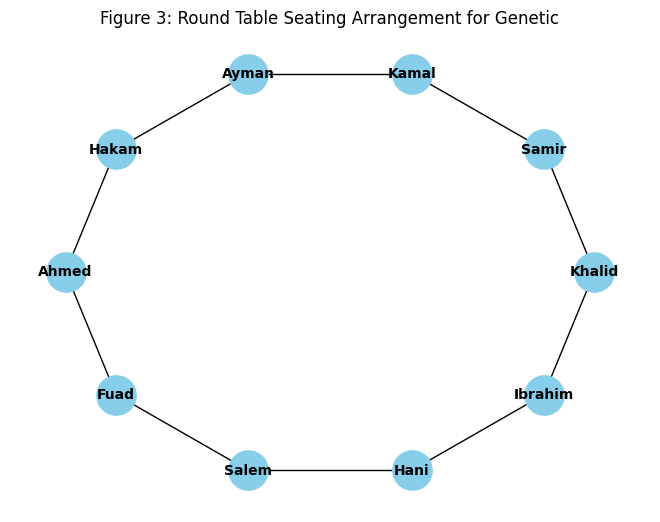

In [11]:
visualize_round_table(optimal_arrangement_genetic, 'Figure 3: Round Table Seating Arrangement for Genetic')

<b>Simulated Annealing  algorithm Implementation</b>

In [12]:
def get_neighbor(arrangement):
    # Generate a neighbor by swapping two random nodes (excluding the start node)
    neighbor = arrangement.copy()
    i, j = random.sample(range(1, len(neighbor)), 2)
    neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
    return neighbor

In [13]:
def simulated_annealing(graph, initial_temperature=1000, cooling_rate=0.99, num_iterations=10000):

    nodes = list(graph.nodes)
    current_arrangement = random.sample(nodes, len(nodes))
    current_cost = calculate_cost(current_arrangement, graph)
    best_arrangement = current_arrangement
    best_cost = current_cost
    temperature = initial_temperature

    for _ in range(num_iterations):
        neighbor = get_neighbor(current_arrangement)
        neighbor_cost = calculate_cost(neighbor, graph)
        cost_diff = neighbor_cost - current_cost

        if cost_diff < 0 or random.random() < math.exp(-cost_diff / temperature):
            current_arrangement = neighbor
            current_cost = neighbor_cost

        if current_cost < best_cost:
            best_arrangement = current_arrangement
            best_cost = current_cost

        temperature *= cooling_rate

    return best_arrangement, best_cost

- Call function on the data and check the time, performace:

In [14]:
optimal_arrangement_annealing, min_cost_annealing = simulated_annealing(graph)
if optimal_arrangement_annealing == None:
    print("Simulated Annealing was not able to find a path")
else: 
    print("The best round table arrangmnet using Simulated annealing is: ", optimal_arrangement_annealing)
    print("Simulated Annealing min total cost", min_cost_annealing)
    print("Average dislike percenatge per edge: ", np.sqrt(min_cost_annealing/55))

The best round table arrangmnet using Greed is:  ['Hakam', 'Ayman', 'Kamal', 'Fuad', 'Salem', 'Samir', 'Khalid', 'Ibrahim', 'Hani', 'Ahmed']
Simulated Annealing min total cost 17567.0
Average dislike percenatge per edge:  17.871765441612084


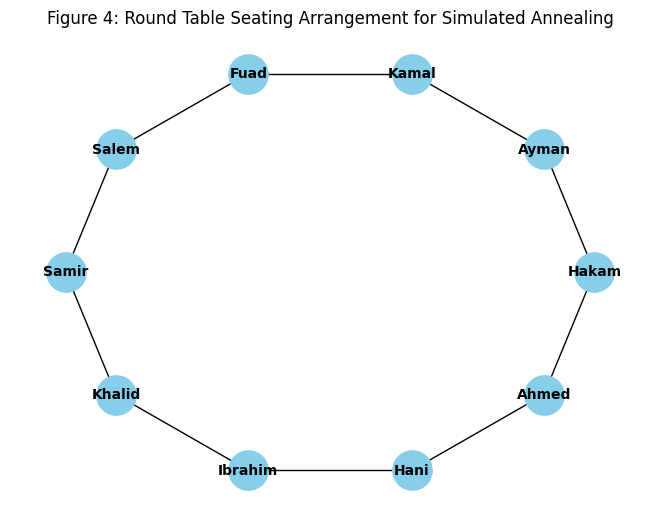

In [15]:
visualize_round_table(optimal_arrangement_annealing,'Figure 4: Round Table Seating Arrangement for Simulated Annealing')

<b>Hill Climbing algorithm Implementation</b>

In [16]:
def get_best_neighbor(arrangement):
    best_neighbor = arrangement
    best_cost = calculate_cost(arrangement, graph)
    for i in range(1, len(arrangement)):
        for j in range(i + 1, len(arrangement)):
            neighbor = arrangement.copy()
            neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
            neighbor_cost = calculate_cost(neighbor, graph)
            if neighbor_cost < best_cost:
                best_cost = neighbor_cost
                best_neighbor = neighbor
    return best_neighbor, best_cost

In [17]:
def hill_climbing(graph, num_restarts=100):
    best_arrangement = None
    best_cost = float('inf')
    nodes = list(graph.nodes)

    for _ in range(num_restarts):
        current_arrangement = random.sample(nodes, len(nodes))
        current_cost = calculate_cost(current_arrangement, graph)

        while True:
            next_arrangement, next_cost = get_best_neighbor(current_arrangement)
            if next_cost >= current_cost:
                break
            current_arrangement, current_cost = next_arrangement, next_cost

        if current_cost < best_cost:
            best_arrangement = current_arrangement
            best_cost = current_cost

    return best_arrangement, best_cost

- Call function on the data and check the time, performace:

In [18]:
optimal_arrangement_hill, min_cost_hill = hill_climbing(graph)
if optimal_arrangement_hill == None:
    print("Hill climbing was not able to find a path")
else:    
    print("The best round table arrangmnet using Hill climbing is: ",optimal_arrangement_hill)
    print("Hill climbing min total cost", min_cost_hill)
    print("Average dislike percenatge per edge: ", np.sqrt(min_cost_hill/55))

The best round table arrangmnet using Hill climbing is:  ['Hani', 'Ibrahim', 'Kamal', 'Samir', 'Khalid', 'Ayman', 'Hakam', 'Ahmed', 'Fuad', 'Salem']
Hill climbing min total cost 15394.0
Average dislike percenatge per edge:  16.729940498725902


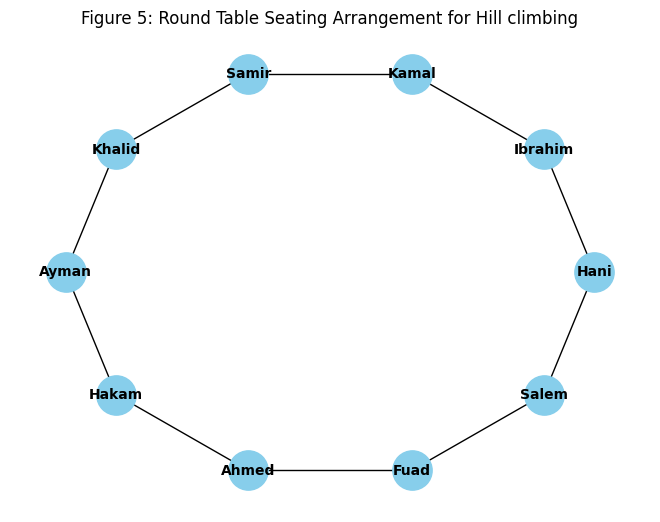

In [19]:
visualize_round_table(optimal_arrangement_hill,'Figure 5: Round Table Seating Arrangement for Hill climbing')

#### <b>Discussion, Evaluation and Results</b>

Three algorthims were implemented to minimize the dislike as a round table arrangemnet is done. The below table shows a summary of the implementations done. 

Table 2: Algorthims Comparision

|Algorithm|Path|Minium Cost|Avg. per edge|
|---------|----|-----------|----|
|Genetic|['Khalid', 'Ayman', 'Hakam', 'Ahmed', 'Hani', 'Salem', 'Fuad', 'Kamal', 'Ibrahim', 'Samir']|15528|16.8|
|Simulated Annealing|['Hakam', 'Ayman', 'Kamal', 'Fuad', 'Salem', 'Samir', 'Khalid', 'Ibrahim', 'Hani', 'Ahmed']|17567|17.9|
|Hill Climbing|['Hani', 'Ibrahim', 'Kamal', 'Samir', 'Khalid', 'Ayman', 'Hakam', 'Ahmed', 'Fuad', 'Salem']|15394|16.7|

> It is noticed that the minumum cost was achieved by the Hill climbing algorithm where it is equal to 15,394 with average 16.7 per edge. Then following it comes the Genetic algorithm where the minumum cost was 15,528 and on average 16.8 per edge. The worst minimum cost was using the simulated annealing which has reached 17,567 and on average 17.9 per edge.

#### <b>Conclusion</b>
In conclusion, the objectives are met where three algorithms were implemnted to find the optimal round arrangement. The implemnations were called and evaluated mainly based on the minimum cost that they had. While 

So the final seating arrangemnet was chosen to be the one that -- obtained, which is the minumum conflict between seats. Folwoing is it's visulization:

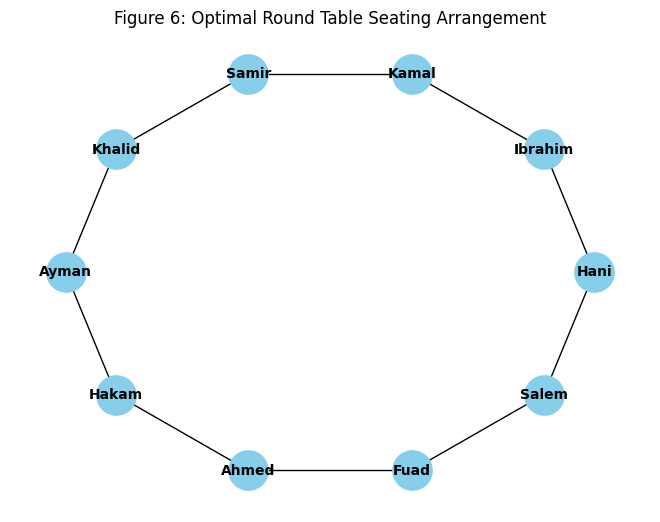

In [20]:
visualize_round_table(optimal_arrangement_hill, 'Figure 6: Optimal Round Table Seating Arrangement')

#### <b>Refrences</b>

- [1] (PDF) Overview of Metaheuristic Algorithms. Available from: https://www.researchgate.net/publication/370422753_Overview_of_Metaheuristic_Algorithms [accessed Jun 08 2024].
- [2] https://www.baeldung.com/cs/heuristics-vs-meta-heuristics-vs-probabilistic-algorithms
- [3] https://www.geeksforgeeks.org/introduction-hill-climbing-artificial-intelligence/